In [2]:
import pandas as pd

df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
X = df[["age", "interest"]].values
Y = df["success"].values

In [5]:
import helper

In [7]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

# Parameter für k (Wie viele Nachbarn betrachtet werden sollen)
param_range = np.array([40, 30, 20, 15, 10, 8, 7, 6, 5, 4, 3, 2, 1])

# n_neighbors bestimmt wie viele Nachbarn sich der Algorithmus anschauen soll
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),
    X,
    Y,
    param_name = "n_neighbors",
    param_range = param_range)

/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [11]:
# führt eine KCross Validation aus, teilt die Daten automatisch in 3 Sätze mit jeweils Trainings und Testdaten auf

print(train_scores)
print(test_scores)

[[0.88832487 0.88888889 0.85929648]
 [0.89847716 0.9040404  0.87939698]
 [0.9035533  0.92929293 0.91959799]
 [0.92385787 0.94949495 0.92964824]
 [0.93908629 0.93939394 0.92462312]
 [0.94416244 0.94949495 0.91959799]
 [0.94416244 0.94444444 0.92462312]
 [0.93401015 0.94949495 0.92964824]
 [0.93401015 0.94444444 0.93969849]
 [0.92893401 0.93939394 0.93969849]
 [0.94923858 0.95959596 0.94974874]
 [0.93401015 0.96969697 0.95477387]
 [1.         1.         1.        ]]
[[0.88       0.84848485 0.90816327]
 [0.88       0.84848485 0.91836735]
 [0.89       0.88888889 0.93877551]
 [0.92       0.90909091 0.92857143]
 [0.93       0.90909091 0.90816327]
 [0.95       0.8989899  0.90816327]
 [0.95       0.88888889 0.90816327]
 [0.94       0.88888889 0.89795918]
 [0.96       0.88888889 0.90816327]
 [0.94       0.91919192 0.86734694]
 [0.95       0.92929293 0.87755102]
 [0.94       0.88888889 0.83673469]
 [0.94       0.87878788 0.89795918]]


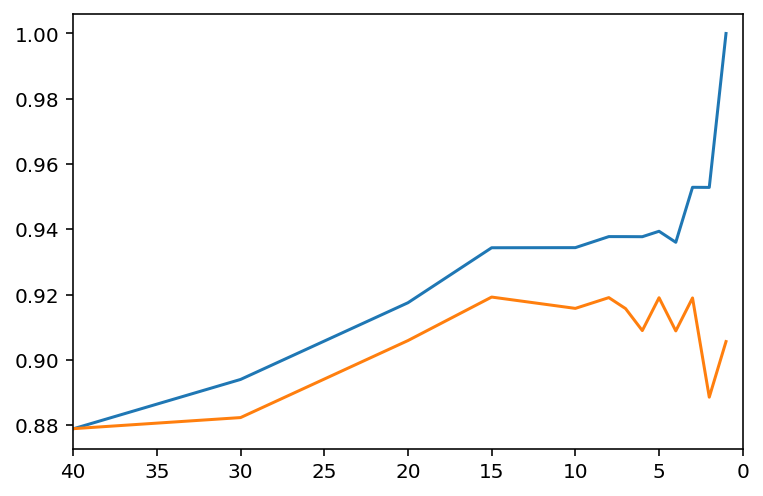

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

# np.mean bedeutet, dass er den durschnittlichen Score nimmt von den 3 Modellen
plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# Hiermit drehen wir die X_Achse um, sie geht jetzt von 40 bis 1
plt.xlim(np.max(param_range), 0)

plt.show()